# 학습 목표
- 배운 pandas, numpy 함수들을 사용하여 데이터 정제

In [38]:
import numpy as np
import pandas as pd
import os

# 1. 월별급여 데이터 병합

In [39]:
# 현재 dir 위치
print(os.getcwd())

C:\Users\USER\02.python\data


In [41]:
# 작업 디렉터리 변경
os.chdir("./data")

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: './data'

In [42]:
os.listdir(os.getcwd())

['exam.csv',
 'height_weight.txt',
 'hr-info.csv',
 'hr-pay-info.csv',
 'mpg.csv',
 'org-info.csv',
 'ratings.dat',
 'total_pay.csv',
 'total_pay_info.csv',
 '시도_성별_경제활동인구_총괄_KOSIS_2022.csv',
 '온도데이터.csv',
 '월별급여',
 '육군신체측정정보.csv',
 '장래_인구변동_KOSIS.csv']

In [43]:
os.listdir('./월별급여')

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [44]:
file_name = os.listdir('./월별급여')

In [45]:
for i in file_name:
    print(i)

hr-pay-info-4월.csv
hr-pay-info-5월.csv
hr-pay-info-6월.csv


In [46]:
# 데이터 프레임이 들어갈 비어있는 리스트
pay_list = []
# 반복문을 통해 데이터 read하고 pay_list에 데이터 append
for i in file_name:
    df = pd.read_csv('./월별급여/'+i, encoding='euc-kr')
    pay_list.append(df)
    display(df.head(2))

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240501,월급,850
1,E00181,20240501,월급,791


,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791


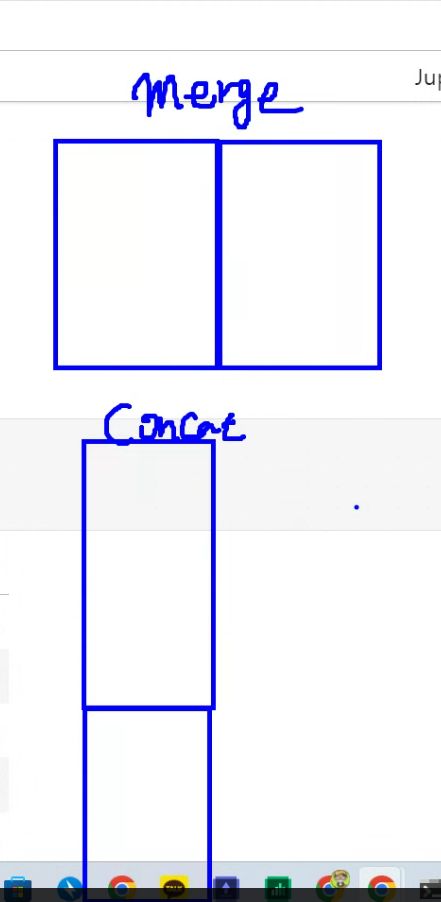

In [47]:
# 데이터 병합
total_pay = pd.concat(pay_list)
total_pay

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [48]:
#csv 파일로 저장
#.to_csv('파일명')
total_pay.to_csv('./total_pay.csv', index = False)

# org_info 조직별 인원수, 나이, 근무년수, 평균연봉

In [49]:
org_info = pd.read_csv('./org-info.csv', encoding = 'euc-kr', index_col = 'ORG_CD')
org_info.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."


In [50]:
org_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, ORG001 to ORG030
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ENG_DIVISION    30 non-null     object
 1   KOR_DIVISION    30 non-null     object
 2   ENG_DEPARTMENT  30 non-null     object
 3   KOR_DEPARTMENT  30 non-null     object
 4   Team            30 non-null     object
 5   KOR_TEAM        30 non-null     object
 6   Role            30 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [51]:
hr_info = pd.read_csv("./hr-info.csv", encoding= "euc-kr")
hr_info.head(2)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [52]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [53]:
hr_org_info = hr_info.groupby(['ORG_CD']).agg({"ENAME":'count',"AGE":'mean','SERVICE_YEAR':"mean","SALARY":"mean"})

In [54]:
# org_info + hr_info 데이터 결합
# index를 기준으로 가로로 병합 - concat
# * 주의사항 : 각각의 df들의 인덱스명은 같아야지 병합 가능
org_hr_concat = pd.concat([org_info, hr_org_info], axis = 1)
org_hr_concat.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000


In [55]:
# 급여 데이터
hr_pay_info = pd.read_csv("./hr-pay-info.csv", encoding = 'euc-kr')
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [56]:
hr_info_df = hr_info[['EID','ENAME','GENDER']]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [57]:
salary_df1 = pd.merge(hr_info_df, hr_pay_info, on = 'EID')
salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00206,시이오,M,20240501,월급,850
2,E00206,시이오,M,20240401,월급,850
3,E00206,시이오,M,20240401,성과급,425
4,E00206,시이오,M,20240401,상여금,300
...,...,...,...,...,...,...
750,E00428,을충나,F,20240601,월급,375
751,E00428,을충나,F,20240501,월급,375
752,E00428,을충나,F,20240401,월급,375
753,E00428,을충나,F,20240401,성과급,188


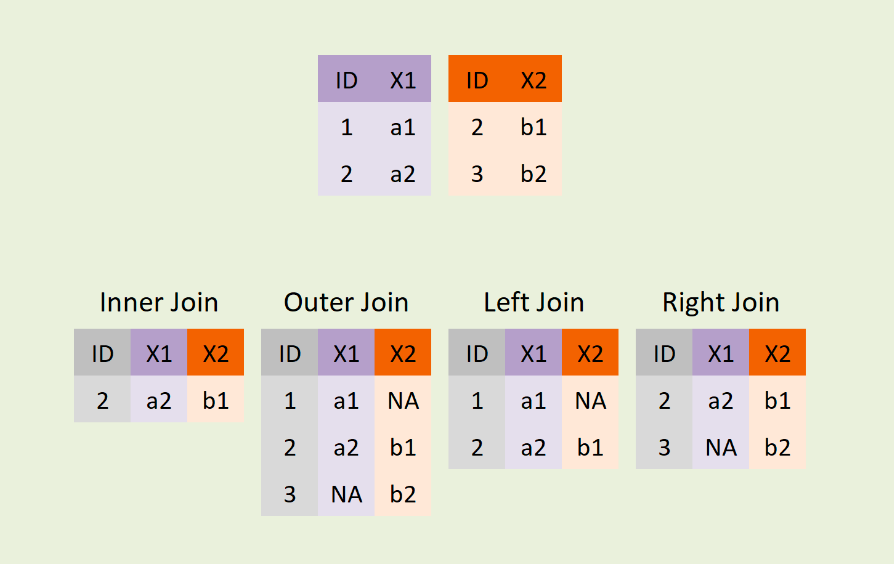

In [58]:
# hr_info_df 구성원, hr_pay_info 급여 데이터
# 구성원 데이터를 기준으로 merge()
salary_df1 = pd.merge(hr_info_df, hr_pay_info, on = 'EID', how = 'left') # how 작성안하면 디폴트는 inner임!
salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [59]:
# 급여 데이터를 기준으로 merge()
salary_df2 = pd.merge(hr_info_df, hr_pay_info, on = 'EID', how = 'left') # how 작성안하면 디폴트는 inner임!
salary_df2

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [69]:
# 구성원을 기준으로 merge 급여를 기준으로 merge 데이터와 50개 데이터 차이
# 급여를 못받은 50개의 데이터 존재 --> 결측치 존재
no_salary = salary_df1[salary_df1['PAYMENT_DY'].isna()]

In [62]:
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [64]:
hr_pay_info[hr_pay_info['EID']=='E00207']

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT


In [67]:
hr_pay_info['PAYMENT_DY'].unique()

array([20240601, 20240501, 20240401], dtype=int64)

In [75]:
pd.merge(no_salary, hr_info, on = "ENAME")[['ENAME','RETIRE_DATE']]

,ENAME,RETIRE_DATE
0,초디소,2022-02-28
1,헌란처,2023-02-28
2,묵단언,2023-02-28
3,우전회,2024-02-29
4,탐선반,2024-02-29
5,민남무,2024-02-29
6,무공담,2024-02-29
7,속묵우,2024-02-29
8,도온강,2024-02-29
9,장춘란,2024-02-29


In [77]:
# hr_info[hr_info['ENAME']==['춘란시']] ??????

In [78]:
# hr_info 데이터로 급여가 높은 순으로 정렬

## 정렬
- 인덱스 : sort_index()
- 값 : sort_values()

In [81]:
# EID 순 정렬
hr_info.head(2)

# 컬럼을 인덱스로 수정
# .set_index(컬럼명)
hr_info.set_index('EID').head(2)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [83]:
hr_info.set_index('EID').sort_index()


,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00494,탄배매,F,ORG030,P007,30,1,학사 학위,3.67,5600,2024-03-01,49,"Salesforce, Java, Marketing",N,2023-03-01,2024-03-01,건강 문제,N,India,Y
E00495,충창동,F,ORG017,P007,30,1,학사 학위,1.92,5600,2024-03-01,59,"Marketing, Project Management, Data Analysis",N,2023-03-01,2024-03-01,이직,N,UK,Y
E00496,우봉망,F,ORG002,P006,35,7,학사 학위,1.20,6700,2024-03-01,62,"Project Management, Marketing",Y,2017-03-01,NaN,NaN,NaN,USA,Y


In [86]:
# df sort_values (by= 컬럼명)
hr_info.sort_values(by='SALARY', ascending = False)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [89]:
#정렬된 값을 원본 데이터에 적용
hr_info.sort_values(by = 'AGE',inplace = True)

In [90]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
9,E00218,영할휘,M,ORG003,P004,48,20,학사 학위,3.22,8500,2022-03-01,86,"Data Analysis, Salesforce",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [91]:
org_hr_concat.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000


In [ ]:
org_hr_concat.head(2)

### rank() - 값 순위 정해주는 함수

In [94]:
# df[컬럼명].rank()  - 낮은 값이 rank 1
# ascending = False - 높은 값이 rank 1
org_hr_concat['SALARY_RANK'] = org_hr_concat['SALARY'].rank(ascending = False)  

In [95]:
org_hr_concat

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY,SALARY_RANK
ORG_CD,,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333,29.0
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000,3.0
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,5,34.600000,7.600000,6480.000000,5.0
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,11,35.181818,7.000000,6445.454545,6.0
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,8,29.250000,2.000000,5525.000000,23.0
ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,6,30.833333,4.166667,5966.666667,16.0
ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",7,36.714286,8.000000,6728.571429,1.0
ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",5,32.400000,5.200000,6020.000000,15.0
ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",5,29.800000,2.200000,5520.000000,24.5


# 데이터 프레임 재구조화
- pivot : 재구조화 행, 열을 재배치<br>
  ㄴpivot(index = '컬럼명', columns = '컬럼명', values = '컬럼명')
- melt : 복구 <br>
  ㄴmelt(id_vars = '컬럼명', value_vars = ['컬럼명', '컬럼명'])

In [96]:
data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [32, 75, 30, 77]
}

df1 = pd.DataFrame(data)
df1

,Date,City,Temperature
0,2024-01-01,New York,32
1,2024-01-01,Los Angeles,75
2,2024-01-02,New York,30
3,2024-01-02,Los Angeles,77


In [97]:
df1.pivot(index = 'Date', columns = 'City', values = 'Temperature')

City,Los Angeles,New York
Date,,
2024-01-01,75,32
2024-01-02,77,30


In [99]:
hr_pay_month = hr_pay_info.query('PAYMENT_DVCD == "월급"')

In [100]:
hr_pay_month.head(2)

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791


In [102]:
hr_pay_month_pivot = hr_pay_month.pivot(index = 'EID', columns = 'PAYMENT_DY', values ='PAYMENT_AMOUNT')
hr_pay_month_pivot

PAYMENT_DY,20240401,20240501,20240601
EID,,,
E00163,417,417,417
E00164,758,758,758
E00165,416,416,416
E00167,608,608,608
E00169,708,708,708
...,...,...,...
E00487,716,716,716
E00491,575,575,575
E00496,558,558,558


In [103]:
#.reset_index()
hr_pay_month_pivot.reset_index()

PAYMENT_DY,EID,20240401,20240501,20240601
0,E00163,417,417,417
1,E00164,758,758,758
2,E00165,416,416,416
3,E00167,608,608,608
4,E00169,708,708,708
...,...,...,...,...
146,E00487,716,716,716
147,E00491,575,575,575
148,E00496,558,558,558
149,E00497,566,566,566


In [104]:
hr_pay_month_pivot.reset_index().melt(id_vars = "EID", value_vars=[20240401,20240501,20240601])


,EID,PAYMENT_DY,value
0,E00163,20240401,417
1,E00164,20240401,758
2,E00165,20240401,416
3,E00167,20240401,608
4,E00169,20240401,708
...,...,...,...
448,E00487,20240601,716
449,E00491,20240601,575
450,E00496,20240601,558
451,E00497,20240601,566
